<a href="https://colab.research.google.com/github/Fatmaaai/AGF-x-ZAKA-Coursework/blob/main/Project_Machine_Translation_(ENG_FR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Translation Using a Seq2Seq Architecture
© 2024, Zaka AI, Inc. All Rights Reserved.

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [ ]:
import pandas as pd
import numpy as np

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207

## Getting the data

In [ ]:
#Test Your Zaka
!git clone https://github.com/zaka-ai/machine_learning_certification.git

%cd machine_learning_certification/Challenge\ 7

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 43.23 MiB | 22.68 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/machine_learning_certification/Challenge 7


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:
#Test Your Zaka (English)
english = pd.read_csv('/content/machine_learning_certification/Challenge 7/en.csv', names=['eng_sentence'])
english.head()

,eng_sentence
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."


In [ ]:
#Test Your Zaka (French)
french = pd.read_csv('/content/machine_learning_certification/Challenge 7/fr.csv', names=['fr_sentence'])
french.head()


,fr_sentence
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


**How many sentences does each of the files contain?**

In [ ]:
#Test Your Zaka
num_english_sentences = english.shape[0]
print(f"Number of sentences in the English file: {num_english_sentences}")

num_french_sentences = french.shape[0]
print(f"Number of sentences in the French file: {num_french_sentences}")

Number of sentences in the English file: 137860
Number of sentences in the French file: 137860


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [ ]:
#Test Your Zaka
df = pd.concat([english, french], axis=1)
df.head()

,eng_sentence,fr_sentence
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Let's name the columns as **English** and **French** so that we access them easier.

In [ ]:
#Test Your Zaka
df.columns = ['English', 'French']
df.head()

,English,French
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Pick a sentence and print it in both languages

In [ ]:
#Test Your Zaka
index = 0
english_sentence = df.loc[index, 'English']
french_sentence = df.loc[index, 'French']

print(f"English Sentence: {english_sentence}")
print(f"French Sentence: {french_sentence}")

English Sentence: new jersey is sometimes quiet during autumn , and it is snowy in april .
French Sentence: new jersey est parfois calme pendant l' automne , et il est neigeux en avril .


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [ ]:
#Test Your Zaka
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['English'] = df['English'].apply(remove_punctuation)
df['French'] = df['French'].apply(remove_punctuation)

print(df.head())

                                             English  \
0  new jersey is sometimes quiet during autumn  a...   
1  the united states is usually chilly during jul...   
2  california is usually quiet during march  and ...   
3  the united states is sometimes mild during jun...   
4  your least liked fruit is the grape  but my le...   

                                              French  
0  new jersey est parfois calme pendant l automne...  
1  les étatsunis est généralement froid en juille...  
2  california est généralement calme en mars  et ...  
3  les étatsunis est parfois légère en juin  et i...  
4  votre moins aimé fruit est le raisin  mais mon...  


Make sure that the punctuation is removed by printing the example that you printed earlier.

In [ ]:
#Test Your Zaka
index = 0
english_sentence = df.loc[index, 'English']
french_sentence = df.loc[index, 'French']

print(f"English Sentence: {english_sentence}")
print(f"French Sentence: {french_sentence}")

English Sentence: new jersey is sometimes quiet during autumn  and it is snowy in april 
French Sentence: new jersey est parfois calme pendant l automne  et il est neigeux en avril 


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [ ]:
#Test Your Zaka
def get_length(text):
    return len(text.split())

In [ ]:
#Test Your Zaka
df['ENG Length'] = df['English'].apply(get_length)
df['FR Length'] = df['French'].apply(get_length)
df.head()

,English,French,ENG Length,FR Length
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l automne...,13,14
1,the united states is usually chilly during jul...,les étatsunis est généralement froid en juille...,15,13
2,california is usually quiet during march and ...,california est généralement calme en mars et ...,13,13
3,the united states is sometimes mild during jun...,les étatsunis est parfois légère en juin et i...,14,13
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14,14


Visualize the distribution of the lengths of english sentences and french sentences.

<Axes: >

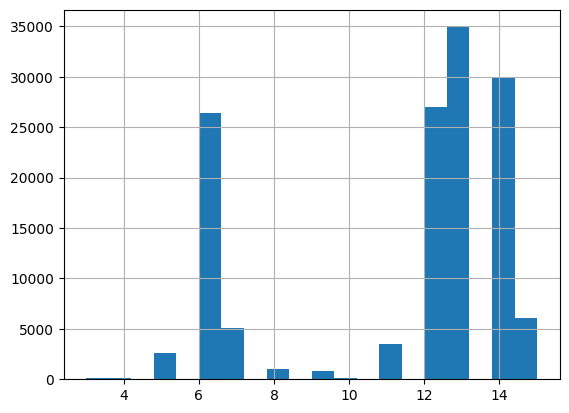

In [ ]:
df["ENG Length"].hist(bins=20)

<Axes: >

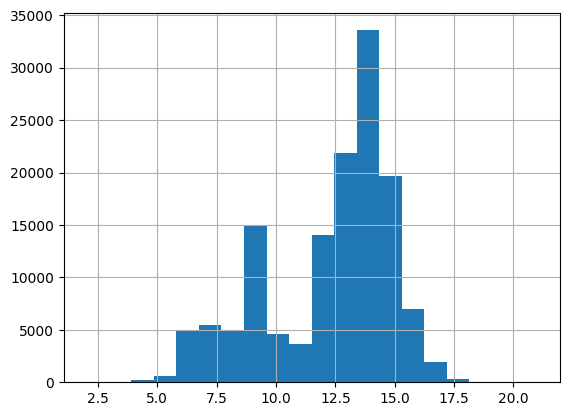

In [ ]:
df["FR Length"].hist(bins=20)

Get the maximum length of an english sentence and the maximum length of a french sentence.

In [ ]:
#Test Your Zaka
eng_max_length = df['ENG Length'].max()
fr_max_length = df['FR Length'].max()
print("The max length of english sentence: {} \nThe max length of french sentence: {}".format(eng_max_length, fr_max_length))

The max length of english sentence: 15 
The max length of french sentence: 21


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

[False! It's generally better to use separate tokenizers for English and French sentences, because tokenization needs to respect the language-specific rules and conventions for each language used.]

Tokenize the sentences that we have.

In [ ]:
#Test Your Zaka
from tensorflow.keras.preprocessing.text import Tokenizer

eng_token = Tokenizer(filters='', lower = False)
eng_token.fit_on_texts(df['English'])
eng_tokenized = eng_token.texts_to_sequences(df['English'])

fr_token = Tokenizer(filters='', lower = False)
fr_token.fit_on_texts(df['French'])
fr_tokenized = fr_token.texts_to_sequences(df['French'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

with open('/content/drive/MyDrive/Colab_Notebooks/eng_token.pkl', 'wb') as f:
    pickle.dump(eng_token, f)

with open('/content/drive/MyDrive/Colab_Notebooks/fr_token.pkl', 'wb') as f:
    pickle.dump(fr_token, f)


**How many unique words do we have in english and in french?**

In [ ]:
#Test Your Zaka
eng_vocab = len(eng_token.word_index)+1
fr_vocab = len(fr_token.word_index)+1
print("English unique words: {} \nFrench unique words: {}".format(eng_vocab, fr_vocab))


English unique words: 200 
French unique words: 346


####Padding

**What should be the length of the sequences that we have after padding?**

[It should be; the maximum length of the tokenized English & French sentences.]

Perform padding on the sequences that we have.

In [ ]:
#Test Your Zaka
from tensorflow.keras.preprocessing.sequence import pad_sequences

eng_padded = pad_sequences(eng_tokenized, maxlen=eng_max_length, padding='post')
fr_padded = pad_sequences(fr_tokenized, maxlen=fr_max_length, padding='post')

italicised text##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

Compile and train the model.
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, RepeatVector, Input, TimeDistributed, GRU

model = Sequential()

# Define input shape explicitly
model.add(Embedding(eng_vocab+1, 100, input_length=eng_max_length, input_shape=(eng_max_length,)))
model.add(GRU(20))
model.add(RepeatVector(fr_max_length))
model.add(GRU(20, return_sequences=True))
model.add(TimeDistributed(Dense(fr_vocab+1, activation='softmax')))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 15, 100)             │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 20)                  │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 21, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 21, 20)              │           2,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 21, 347)             │           7,287 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,227 (145.42 KB)

 Trainable params: 37,227 (145.42 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Test Your Zaka
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 10)
history = model.fit(eng_padded,
                        fr_padded,
                        epochs=25,
                        batch_size=64,
                        validation_split = 0.2,
                        callbacks=[early_stop])


Epoch 1/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 95s 52ms/step - accuracy: 0.4292 - loss: 3.1871 - val_accuracy: 0.5081 - val_loss: 2.2423
Epoch 2/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 142s 52ms/step - accuracy: 0.5180 - loss: 2.1670 - val_accuracy: 0.5655 - val_loss: 1.8763
Epoch 3/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 141s 51ms/step - accuracy: 0.5738 - loss: 1.7546 - val_accuracy: 0.5973 - val_loss: 1.5340
Epoch 4/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 141s 51ms/step - accuracy: 0.6000 - loss: 1.4930 - val_accuracy: 0.6143 - val_loss: 1.4012
Epoch 5/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 87s 50ms/step - accuracy: 0.6155 - loss: 1.3860 - val_accuracy: 0.6280 - val_loss: 1.3288
Epoch 6/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 143s 51ms/step - accuracy: 0.6311 - loss: 1.3119 - val_accuracy: 0.6370 - val_loss: 1.2808
Epoch 7/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 144s 52ms/step - accuracy: 0.6427 - loss: 1.2483 - val_accuracy: 0.6523 - val_loss: 1.2087
Epoch 8/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 0.

Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [ ]:
def final_predictions_model1(sentence):

  y_id_to_word = {value: key for key, value in fr_token.word_index.items()}
  y_id_to_word[0] = '<PAD>'
  sentence = [eng_token.word_index[word] for word in sentence.split()]
  prediction = model.predict(pad_sequences([sentence], maxlen=eng_max_length, padding='post'))

  print(' '.join([y_id_to_word[np.argmax(x)] for x in prediction[0]]))

Test the following sentence

In [ ]:
input = "she is driving the truck"

final_predictions_model1(input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
elle est ce ce camion plus <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, RepeatVector, Input, TimeDistributed, GRU, Bidirectional # Import Bidirectional

model = Sequential()


model.add(Embedding(eng_vocab+1, 100, input_length=eng_max_length, input_shape=(eng_max_length,)))
model.add(Bidirectional(GRU(20)))
model.add(RepeatVector(fr_max_length))
model.add(Bidirectional(GRU(20, return_sequences=True)))
model.add(TimeDistributed(Dense(fr_vocab+1, activation='softmax')))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 15, 100)             │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 40)                  │          14,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ (None, 21, 40)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 21, 40)              │           7,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 21, 347)             │          14,227 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,407 (220.34 KB)

 Trainable params: 56,407 (220.34 KB)

 Non-trainable params: 0 (0.00 B)

compile and train your new model.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 10)
history = model.fit(eng_padded,
                        fr_padded,
                        epochs=25,
                        batch_size=64,
                        validation_split = 0.2,
                        callbacks=[early_stop])

Epoch 1/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 146s 78ms/step - accuracy: 0.4581 - loss: 2.8012 - val_accuracy: 0.5602 - val_loss: 1.7413
Epoch 2/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 141s 78ms/step - accuracy: 0.5857 - loss: 1.6232 - val_accuracy: 0.6443 - val_loss: 1.3517
Epoch 3/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 143s 78ms/step - accuracy: 0.6522 - loss: 1.2984 - val_accuracy: 0.6865 - val_loss: 1.1504
Epoch 4/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 145s 84ms/step - accuracy: 0.6966 - loss: 1.1127 - val_accuracy: 0.7192 - val_loss: 1.0066
Epoch 5/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 136s 79ms/step - accuracy: 0.7257 - loss: 0.9842 - val_accuracy: 0.7468 - val_loss: 0.9089
Epoch 6/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 138s 77ms/step - accuracy: 0.7524 - loss: 0.8893 - val_accuracy: 0.7709 - val_loss: 0.8285
Epoch 7/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 135s 78ms/step - accuracy: 0.7746 - loss: 0.8156 - val_accuracy: 0.7889 - val_loss: 0.7694
Epoch 8/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 135s 78ms/step - accuracy: 

Define a new function that relies on your new model to make predictions.

In [ ]:
def final_predictions_model2(sentence):

  y_id_to_word = {value: key for key, value in fr_token.word_index.items()}
  y_id_to_word[0] = '<PAD>'
  sentence = [eng_token.word_index[word] for word in sentence.split()]
  prediction = model.predict(pad_sequences([sentence], maxlen=eng_max_length, padding='post'))

  print(' '.join([y_id_to_word[np.argmax(x)] for x in prediction[0]]))

In [ ]:
input = "she is driving the truck"

final_predictions_model2(input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
il ce le camion <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

[Maybe adding more layers or an additional layer to the d bidirectional LSTMs or change the embedded layer size from 128 to 256.]

**What are some additional ways that we can do to improve the performance
of our model?**

[as i researched more about Seq2Seq models, there was examples of attention layers used in the input sequence during decoding. also maybe some normalization layer for the training.]


In [ ]:
model.save('/content/drive/MyDrive/Colab_Notebooks/translation_model.keras')


# Model Deployment Preparation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install flask

In [ ]:
%%writefile model_utils.py

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import pickle

def load_model():
    """
    Loads the trained machine translation model and the tokenizer.
    Returns:
        tuple: (model, tokenizer)
    """

    model_path = '/content/drive/MyDrive/Colab_Notebooks/translation_model.keras'
    model = tf.keras.models.load_model(model_path)


    with open('/content/drive/MyDrive/Colab_Notebooks/eng_token.pkl', 'rb') as handle:
        eng_token = pickle.load(handle)


    with open('/content/drive/MyDrive/Colab_Notebooks/fr_token.pkl', 'rb') as handle:
        fr_token = pickle.load(handle)

    return model, eng_token, fr_token



def translate(input_text, model, eng_token, fr_token):
    """
    Translates an English sentence to French.
    """


    sentence_tokens = []
    for word in input_text.split():
        if word in eng_token.word_index:
            sentence_tokens.append(eng_token.word_index[word])
        else:
            pass


    eng_max_length = 15
    sentence_tokens = pad_sequences([sentence_tokens],
                                    maxlen=eng_max_length,
                                    padding='post')

    prediction = model.predict(sentence_tokens)


    fr_id_to_word = {value: key for key, value in fr_token.word_index.items()}
    fr_id_to_word[0] = '<PAD>'


    translated_tokens = [np.argmax(step) for step in prediction[0]]


    translated_text = ' '.join([fr_id_to_word[token] for token in translated_tokens])

    return translated_text



Writing model_utils.py


In [ ]:
from model_utils import load_model, translate

In [ ]:
!pip install flask pyngrok


In [ ]:
%%writefile app.py

from flask import Flask, request, jsonify
from model_utils import load_model, translate

app = Flask(__name__)


model, eng_token, fr_token = load_model()

@app.route('/')
def index():
    return '''
    <html>
    <body>
        <h1>Translation App (English to French)</h1>
        <textarea id="inputText" placeholder="Enter English text"></textarea><br>
        <button onclick="translateText()">Translate</button>
        <p id="output"></p>

        <script>
            async function translateText() {
                const inputText = document.getElementById("inputText").value;
                const response = await fetch('/translate', {
                    method: 'POST',
                    headers: { 'Content-Type': 'application/json' },
                    body: JSON.stringify({ text: inputText })
                });
                const data = await response.json();
                document.getElementById("output").innerText = data.translation;
            }
        </script>
    </body>
    </html>
    '''

@app.route('/translate', methods=['POST'])
def handle_translation():
    user_input = request.json.get('text', '')
    output_text = translate(user_input, model, eng_token, fr_token)
    return jsonify({'translation': output_text})

if __name__ == '__main__':
    app.run(port=5000, host='0.0.0.0', debug=True)


Writing app.py


In [ ]:
from pyngrok import ngrok

!ngrok config add-authtoken 2r7vEDycdMnZI0MI7TJUHkL2qZW_7xtvVKwHk5sQZ4U8kmnSh


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:

get_ipython().system_raw('python app.py &')


from pyngrok import ngrok
public_url = ngrok.connect(5000)
print("Use this URL to access your Flask app:", public_url.public_url)


Use this URL to access your Flask app: https://7e45-34-126-160-152.ngrok-free.app


In [ ]:
!python app.py

2025-01-04 13:34:56.383119: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-04 13:34:56.429438: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-04 13:34:56.447229: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-04 13:34:58.857514: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
 * Serving Flask app 'app'
 * Debug mode: on
Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


In [ ]:
# Restarting here after failours
from pyngrok import ngrok
ngrok.kill()


In [ ]:
!zip -r translation_project.zip app.py model_utils.py translation_model.keras eng_token.pkl fr_token.pkl


updating: app.py (deflated 54%)
updating: model_utils.py (deflated 62%)
updating: eng_token.pkl (deflated 36%)
updating: fr_token.pkl (deflated 36%)
  adding: translation_model.keras (deflated 13%)


In [ ]:
!pwd

/content/machine_learning_certification/Challenge 7


In [ ]:
!ls

app.py	eng_token.pkl  fr_token.pkl    __pycache__	     translation_model.keras
en.csv	fr.csv	       model_utils.py  translation_model.h5  translation_project.zip


# GRADIO


In [ ]:
!pip install gradio


In [ ]:
import tensorflow as tf
import pickle
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences


model_path = "/content/drive/MyDrive/Colab_Notebooks/translation_model.keras"
model = tf.keras.models.load_model(model_path)


with open('/content/drive/MyDrive/Colab_Notebooks/eng_token.pkl', 'rb') as handle:
    eng_token = pickle.load(handle)

with open('/content/drive/MyDrive/Colab_Notebooks/fr_token.pkl', 'rb') as handle:
    fr_token = pickle.load(handle)


def translate(input_text):
    sentence_tokens = [eng_token.word_index.get(word, 0) for word in input_text.split()]
    eng_max_length = 15
    sentence_tokens = pad_sequences([sentence_tokens], maxlen=eng_max_length, padding='post')


    prediction = model.predict(sentence_tokens)


    y_id_to_word = {value: key for key, value in fr_token.word_index.items()}
    y_id_to_word[0] = '<PAD>'
    translated_tokens = [y_id_to_word.get(np.argmax(step), '<UNK>') for step in prediction[0]]
    translated_sentence = ' '.join(translated_tokens)

    return translated_sentence


In [ ]:
import tensorflow as tf
import pickle
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences


interface = gr.Interface(
    fn=translate,
    inputs=gr.Textbox(label="Enter English Text"),
    outputs=gr.Textbox(label="Translated French Text"),
    title="English to French Translator",
    description="Enter an English sentence and get its French translation."
)


interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b2dbc3fb099875f88a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
docker build -t translation-app .
docker run -p 5000:5000 translation-app